In [21]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

In [34]:
%matplotlib inline

In [42]:
X, y_true = make_blobs(n_samples=300, n_features=3, centers=4, cluster_std=0.60, random_state=0)

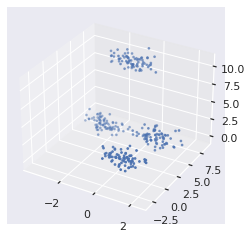

In [74]:
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], s=3, cmap="viridis")

In [44]:
from sklearn.cluster import KMeans

In [45]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

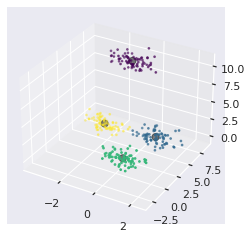

In [76]:
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=y_kmeans, s=3, cmap='viridis')

centers = kmeans.cluster_centers_
ax.scatter3D(centers[:, 0], centers[:, 1], centers[:, 2], c='black', s=50, alpha=0.5)

## Basic implementation

In [69]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, labels

In [57]:
rng = np.random.RandomState(2)
i = rng.permutation(300)[:3]
X[i]

array([[-1.8590809 ,  7.78874716,  9.50289467],
       [-2.01374248,  6.08807793, -0.23797004],
       [ 1.15775322,  3.92319407,  1.83762282]])

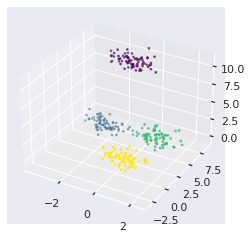

In [72]:
centers, labels = find_clusters(X, 4)
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=labels, s=3, cmap='viridis');

In [87]:
np.linspace(-0.1, 1.1, 5)[None,:]

array([[-0.1,  0.2,  0.5,  0.8,  1.1]])